In [19]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from cartopy import feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [20]:
pptn = xr.open_dataarray('D:\\Climate_Tutorial\\ERA5 DATASET\\precipitation_2021.nc')
pptn = pptn*1000
pptn

<xarray.DataArray 'tp' (time: 6, expver: 2, latitude: 81, longitude: 161)>
array([[[[3.645197e-03, ..., 0.000000e+00],
         ...,
         [1.550532e+00, ..., 1.712979e+00]],

        [[         nan, ...,          nan],
         ...,
         [         nan, ...,          nan]]],


       ...,


       [[[         nan, ...,          nan],
         ...,
         [         nan, ...,          nan]],

        [[2.082437e-03, ..., 0.000000e+00],
         ...,
         [1.653624e+00, ..., 2.416394e+00]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 0.75 0.5 0.25 0.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-06-01

In [3]:
temp = temp - 273.15

## Extracting and plotting point data

In [ ]:
# We can also use isel to select by index, but we'll select for equality
first_point = pptn.isel(latitude=0, longitude=0) #Select by position in arrays(1st position within the array)
darmstadt = (latitude=2, longitude=[-20,18,0.5], method="nearest").plot.line(x="time")
darmstadt.plot()

SyntaxError: invalid syntax (<ipython-input-30-111c735ea000>, line 3)

#Looks like temp has its peak in January 2020, exponentially decreasing through July.
#We can also plot the time series for multiple points at the same time. Here we plot Temp over two different longitude

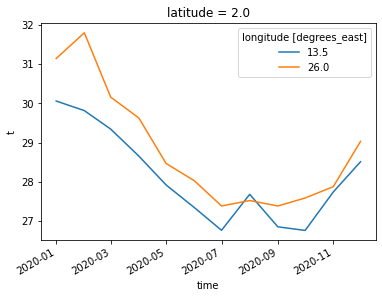

In [6]:
temp.sel(latitude=2, longitude=[13.5, 26.0], method="nearest").plot.line(x="time")

#the above shows temperature trends where (blue) corresponds to west africa and 
#and(yellow)north africa. North Africa indicates high temperature through the months

## Maps

##For a first glance, we plot a single time slice to see what we can see

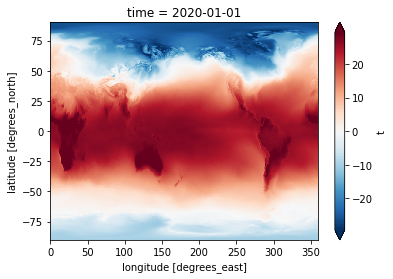

In [14]:
# using geophysical units. robust disregards outliers for colour map creation.
temp.isel(time=0).plot(robust=True)

#Above is the spatial global temperature trend. We can see that high temperature is concentrated in the Tropical band while the poles exhibits relatively low temsperatures.

#This is fine for getting a first glance, but we can reproject this onto a globe or any other coordinate system we like.

In [15]:
import cartopy.crs as ccrs
from cartopy.feature import BORDERS
from cartopy.io.img_tiles import StamenTerrain
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

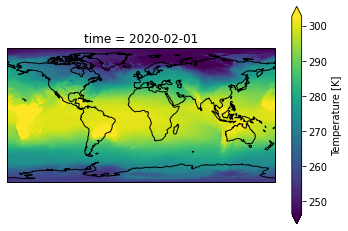

In [43]:
# Centered over Africa
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
# use last time step in array
p = temp.isel(time=1).plot(transform=ccrs.RotatedPole(), robust=True)